En basit tanimiyla k-fold cross validation test ve train icin ayirdigimiz verileri tekrar tekrar ayristirarak en dogru sonucu bulmaya calisir.

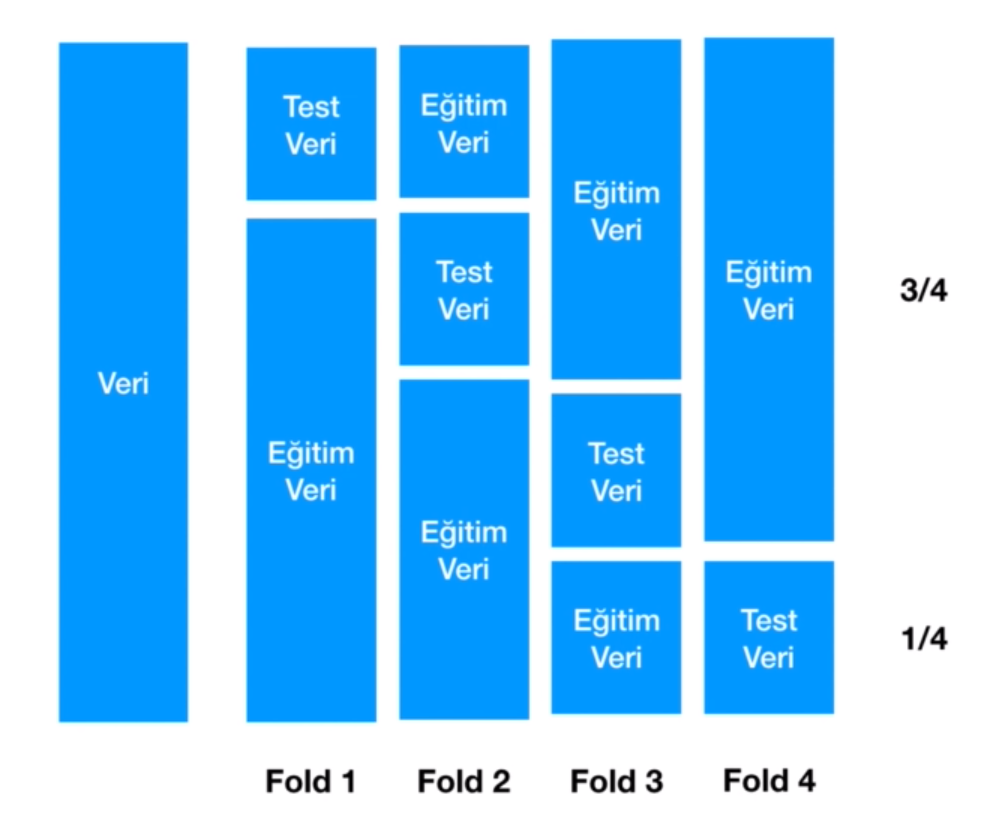

Kutuphanelerimizi ve verimizi dahil ederek baslayalim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')

In [3]:
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
225,15622171,Male,37,53000,0
313,15753861,Female,49,141000,1
153,15619087,Female,36,50000,0
238,15617877,Female,46,82000,0
207,15794566,Female,52,114000,0
241,15736228,Male,38,59000,0
348,15579212,Male,39,77000,0
357,15671387,Female,41,72000,0
124,15678168,Female,41,51000,0
281,15685536,Male,35,61000,0


Verimize baktigimizda user id ile bir isimiz olmadigini anliyoruz. Gozetimli ogrenim oldugu icin test train kullanirken onu almayacagiz. Verileri ayirarak devam edelim.

In [4]:
X = df.iloc[:, [2, 3]]
y = df.iloc[:, 4]

In [5]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

Bagimli ve bagimsiz degiskenlerimizi ayirdik.

Test train ile devam edelim.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [9]:
X_train.head()

,Age,EstimatedSalary
66,24,19000
240,42,149000
218,46,96000
101,28,59000
311,39,96000


Verilerimizin degerlerini bir skalaya sikistirarak devam edelim.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Sirada modelimizi olusturup egitmek var. Burada herhangi bir model kullanilabilir. Biz svc ile devam edelim.

In [12]:
from sklearn.svm import SVC

In [13]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

Tahminlerimizi alalim.

In [14]:
y_pred = classifier.predict(X_test)

Sira geldi cross validation islemine.

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
crossValidation = cross_val_score(estimator = classifier,#Egitmek icin kullandigimiz model.
                                  X=X_train, 
                                  y=y_train, 
                                  cv = 4)# Katlama sayisi.

Skorlarimizi bakalim.

In [17]:
crossValidation

array([0.88059701, 0.88059701, 0.91044776, 0.95522388])

4 katlamali yaptigimiz icin her katlamadaki skoru goruyoruz. Skorun giderek arttigina dikkat edelim.